In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
smile_on = pd.read_csv('../data/SmileOn11.28.2020.csv', sep = ',', encoding='gbk', skiprows = 2)
data_dict = pd.read_excel('../data/Data_Dictionary.xlsx')
bill = pd.read_csv('../data2/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2017 (1).csv')
prov_out = pd.read_csv('../data2/Provider_Outpatient_Hospital_Charge_Data_by_APC__CY2017.csv')
city_info = pd.read_csv('../data2/500_Cities__Local_Data_for_Better_Health__2019_release.csv')
apc = pd.read_excel('../data2/2020_October_Web_Addendum_B.10212020.xlsx', skiprows = 2)
hcpcs = pd.read_excel('../data2/2020_October_Web_Addendum_A.10212020.xlsx', skiprows = 1)

In [5]:
#data_dict.head()

In [6]:
prov_out.APC_Desc.value_counts()

Comprehensive Observation Services                         87
Level 1 Laparoscopy and Related Services                   67
Level 2 Excision/ Biopsy/ Incision and Drainage            66
Level 3 Musculoskeletal Procedures                         65
Level 2 Upper GI Procedures                                59
Abdominal/Peritoneal/Biliary and Related Procedures        58
Level 4 Musculoskeletal Procedures                         58
Level 2 Musculoskeletal Procedures                         49
Level 5 Urology and Related Services                       49
Level 4 Urology and Related Services                       48
Level 3 Urology and Related Services                       48
Level 1 Endovascular Procedures                            47
Level 3 Endovascular Procedures                            44
Level 1 Intraocular Procedures                             43
Level 3 Excision/ Biopsy/ Incision and Drainage            41
Level 4 Airway Endoscopy                                   38
Level 1 

In [7]:
bill.columns

Index(['National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

In [8]:
city_info_tn = city_info[city_info['StateAbbr'] == 'TN']

In [9]:
city_info_tn_teeth_loss = city_info_tn[(city_info_tn['Measure'] == 'All teeth lost among adults aged >=65 Years') & (city_info_tn['GeographicLevel'] == 'City') & (city_info_tn['DataValueTypeID'] == 'AgeAdjPrv')]

In [10]:
tooth_loss_chart = city_info_tn_teeth_loss.iloc[:, 0:18].sort_values(by='CityName')

In [11]:
tooth_loss_chart = tooth_loss_chart.sort_values(by='Data_Value')

In [12]:
#city_teeth.columns=['CityName','Data_Value_Type', 'Data_Value','Low_Confidence_Limit','High_Confidence_Limit','PopulationCount']


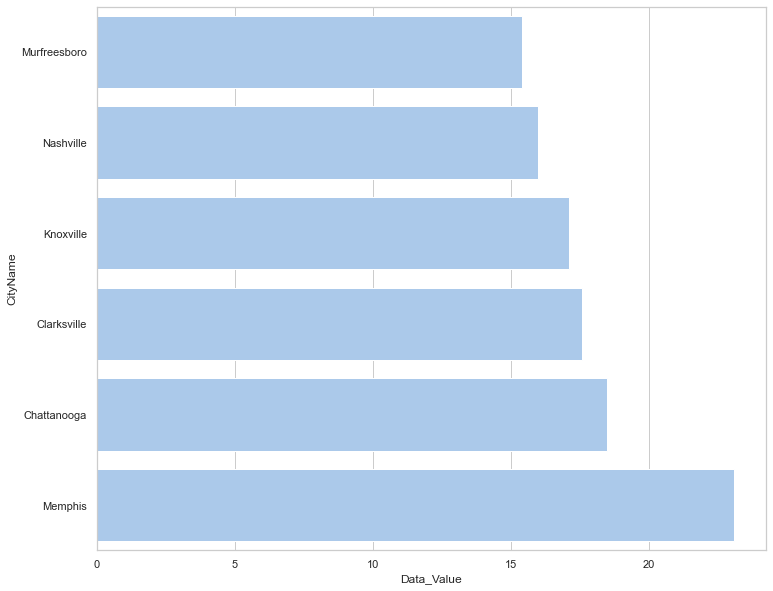

In [13]:
#sns.barh('CityName', 'DataValue', data = tooth_loss_chart)

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="CityName", x="Data_Value", data=tooth_loss_chart,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x="alcohol", y="abbrev", data=crashes,
            #label="Alcohol-involved", color="b")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",xlabel="Automobile collisions per billion miles")
#sns.despine(left=True, bottom=True)

In [14]:
city_info_tn_teeth_loss.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

In [15]:
smile_on.shape

(40032, 184)

In [16]:
visits = smile_on.CallerNum.value_counts().to_frame().reset_index()

In [17]:
combo = pd.concat([smile_on.iloc[:, 6:7],  smile_on.iloc[:, 16:21], smile_on.iloc[:, 48:49], smile_on.iloc[:, 58:60], smile_on.iloc[:, 137:138], smile_on.iloc[:, 160:161], smile_on.iloc[:, 176:177], smile_on.iloc[:, 179:182]], axis = 1)

In [19]:
#combo.sort_values(by='CallerNum').head(25)

In [20]:
so_1 = smile_on[['CallReportNum', 'ReportVersion', 'CallerNum', 'CityName', 'CountyName', 'PostalCode', 'EnteredOn', 'Birth Year', 'SMILE ON 60+ Screening - Last Screening Date', 'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)', 'SMILE ON 60+ Site Information - Enroller ID', 'SMILE ON 60+ Site Information - Enroller Location', 'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?', 'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?', 'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)', 'SMILE ON 60+ Verification of Eligibility - Transportation Arranged', 'SMILE ON 60+ Verification of Eligibility - Verification of Eligibility']]

In [21]:
so_1['PostalCode'].value_counts()

37130.0    1119
37013.0     966
37207.0     934
37211.0     787
37115.0     751
           ... 
37409.0       1
37406.0       1
37370.0       1
37320.0       1
30741.0       1
Name: PostalCode, Length: 479, dtype: int64

In [22]:
so_1 = so_1.sort_values(by='CallerNum')

In [24]:
#so_1.info()

In [26]:
so_1 = so_1[(so_1['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]
#so_1

In [27]:
so_1y = so_1[so_1['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'] == 'Yes']

In [29]:
#so_1y

In [30]:
so_1.CityName.value_counts()

Nashville       6449
Memphis         6304
Murfreesboro    2435
Cleveland       1718
Knoxville       1461
                ... 
Buchanan           1
Lancing            1
Duluth             1
Lake City          1
Huron              1
Name: CityName, Length: 387, dtype: int64

In [31]:
city_info_tn.CityName.value_counts()

Memphis         5112
Nashville       4423
Knoxville       2318
Chattanooga     1634
Clarksville     1033
Murfreesboro     779
Name: CityName, dtype: int64

In [32]:
so_1['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts()

No     8123
Yes    6149
Name: SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), dtype: int64

In [33]:
so_1['SMILE ON 60+ Site Information - Enroller ID'].value_counts()

Interfaith Dental Clinic - Nashville                                                    5794
Interfaith Dental Clinic - Murfreesboro                                                 3646
Church Health Center - Memphis                                                          3581
Matthew Walker Comprehensive Health Center Inc. - Nashville                             2516
Interfaith Health Clinic of Knoxville - Knoxville                                       1822
Karis Dental Clinic - Cleveland                                                         1809
Friends in Need Health Center - Kingsport                                               1566
Healing Hands Health Center - Bristol                                                   1345
Keystone Dental Care Inc. - Johnson City                                                1031
Christ Community Health Services- Hickory Hill                                           986
Christ Community Health Services- Frayser                             

In [34]:
so_1.CallerNum.value_counts()

2441776    36
2431132    31
2416076    29
2466994    28
2860770    28
           ..
3200276     1
3624167     1
3853431     1
2825325     1
3827725     1
Name: CallerNum, Length: 8706, dtype: int64

In [36]:
so_2441776 = so_1[so_1['CallerNum'] == 2441776]
#so_2441776

In [38]:
so_2431132 = so_1[so_1['CallerNum'] == 2431132]
#so_2431132

In [39]:
prodcedure_types = smile_on['SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)'].value_counts().to_frame().reset_index()

In [41]:
#prodcedure_types.head(20)

In [42]:
interfaith = so_1[so_1['SMILE ON 60+ Site Information - Enroller ID'].str.contains('Interfaith Dental Clinic - Murfreesboro', na = False)]

In [44]:
#interfaith

In [45]:
smile_on['SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?'].value_counts()

Yes    22462
No     10770
Name: SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?, dtype: int64

In [46]:
clinical = so_1[so_1['ReportVersion'] == 'SMILE ON 60+ Clinical']

In [49]:
#clinical.columns

In [50]:
patients = so_1.drop_duplicates(['CallerNum'], keep='first')

In [51]:
patients['SMILE ON 60+ Site Information - Enroller ID'].value_counts()

Church Health Center - Memphis                                                          799
Interfaith Dental Clinic - Nashville                                                    738
Matthew Walker Comprehensive Health Center Inc. - Nashville                             514
Interfaith Dental Clinic - Murfreesboro                                                 485
Interfaith Health Clinic of Knoxville - Knoxville                                       326
Karis Dental Clinic - Cleveland                                                         285
Healing Hands Health Center - Bristol                                                   280
Keystone Dental Care Inc. - Johnson City                                                262
Friends in Need Health Center - Kingsport                                               247
Christ Community Health Services- Hickory Hill                                          193
Christ Community Health Services- Frayser                                       

In [52]:
patients.shape

(8706, 17)

In [54]:
so_1.columns=['CallReportNum', 'ReportVersion', 'CallerNum', 'CityName', 'CountyName',
       'PostalCode', 'EnteredOn', 'Birth Year',
       'Screening - Last Screening Date',
       'Oral Care Encounter - What care was provided to the enrollee?',
       'Site Information - Enroller ID',
       'Site Information - Enroller Location',
       'Treatment Plan - Is the treatment plan completed?',
       'Treatment Plan - Was a treatment plan developed?',
       'Treatment Plan - Was the enrollee able to be restored to function',
       'Verification of Eligibility Transportation Arranged',
       'Verification of Eligibility']
#so_1.columns

In [55]:
treatment_plan = so_1[so_1['Treatment Plan - Is the treatment plan completed?'] == 'Yes']

In [56]:
treatment_plan = treatment_plan.sort_values(by = 'EnteredOn')

In [57]:
treatment_plan_patients = treatment_plan.drop_duplicates(['CallerNum'], keep='last')
treatment_plan_patients.shape

(2987, 17)

In [58]:
treatment_plan_patients['Site Information - Enroller ID'].value_counts()

Church Health Center - Memphis                                                          385
Interfaith Dental Clinic - Nashville                                                    370
Interfaith Dental Clinic - Murfreesboro                                                 251
Healing Hands Health Center - Bristol                                                   224
Interfaith Health Clinic of Knoxville - Knoxville                                       216
Keystone Dental Care Inc. - Johnson City                                                194
Friends in Need Health Center - Kingsport                                               193
Matthew Walker Comprehensive Health Center Inc. - Nashville                             189
Karis Dental Clinic - Cleveland                                                         180
Christ Community Health Services- Hickory Hill                                          101
Appalachian Miles for Smiles - Mobile                                           

In [59]:
treatment_plan_patients_restored = treatment_plan_patients[treatment_plan_patients['Treatment Plan - Was the enrollee able to be restored to function'] == 'Yes']

In [61]:
#treatment_plan_patients_restored

In [62]:
treatment_plan_patients_not_restored = treatment_plan_patients[treatment_plan_patients['Treatment Plan - Was the enrollee able to be restored to function'] == 'No']

In [64]:
#treatment_plan_patients_not_restored

In [65]:
treatment_plan_patients['Treatment Plan - Was the enrollee able to be restored to function'].isnull().sum()

248

In [66]:
so_1_clinics = so_1[so_1['Treatment Plan - Was the enrollee able to be restored to function'].isnull()]

In [67]:
so_1_clinics['Site Information - Enroller ID'].value_counts()

Interfaith Dental Clinic - Nashville                                                    3567
Church Health Center - Memphis                                                          2259
Interfaith Dental Clinic - Murfreesboro                                                 2235
Christ Community Health Services- Frayser                                                767
Interfaith Health Clinic of Knoxville - Knoxville                                        752
Healing Hands Health Center - Bristol                                                    739
Karis Dental Clinic - Cleveland                                                          730
Friends in Need Health Center - Kingsport                                                727
Neighborhood Health - Cleveland Park/ Nashville                                          712
Matthew Walker Comprehensive Health Center Inc. - Nashville                              685
Keystone Dental Care Inc. - Johnson City                              

In [68]:
so_1['Site Information - Enroller ID'].value_counts()

Interfaith Dental Clinic - Nashville                                                    5794
Interfaith Dental Clinic - Murfreesboro                                                 3646
Church Health Center - Memphis                                                          3581
Matthew Walker Comprehensive Health Center Inc. - Nashville                             2516
Interfaith Health Clinic of Knoxville - Knoxville                                       1822
Karis Dental Clinic - Cleveland                                                         1809
Friends in Need Health Center - Kingsport                                               1566
Healing Hands Health Center - Bristol                                                   1345
Keystone Dental Care Inc. - Johnson City                                                1031
Christ Community Health Services- Hickory Hill                                           986
Christ Community Health Services- Frayser                             

In [69]:
patients_restored = so_1[so_1['Treatment Plan - Was the enrollee able to be restored to function'].isin(['Yes', 'No'])]
patients_restored = patients_restored[(patients_restored['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]

<ipython-input-69-dea99bf5ca59>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  patients_restored = patients_restored[(patients_restored['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]


In [70]:
patients_restored = patients_restored.sort_values(by = 'EnteredOn')

In [71]:
patients_restored = patients_restored.drop_duplicates(['CallerNum'], keep='last')
patients_restored.shape

(4575, 17)

In [72]:
patients_restored['Treatment Plan - Was the enrollee able to be restored to function'].value_counts()

Yes    2488
No     2087
Name: Treatment Plan - Was the enrollee able to be restored to function, dtype: int64

In [73]:
(2488/(2488 + 2087)) * 100

54.38251366120218

In [74]:
patients_restored_yes = patients_restored[patients_restored['Treatment Plan - Was the enrollee able to be restored to function'] == 'Yes']
patients_restored_no = patients_restored[patients_restored['Treatment Plan - Was the enrollee able to be restored to function'] == 'No']

In [75]:
yes = patients_restored_yes['Site Information - Enroller ID'].value_counts().to_frame().reset_index()

In [76]:
yes

,index,Site Information - Enroller ID
0,Church Health Center - Memphis,347
1,Interfaith Dental Clinic - Nashville,346
2,Interfaith Dental Clinic - Murfreesboro,233
3,Healing Hands Health Center - Bristol,188
4,Friends in Need Health Center - Kingsport,171
5,Matthew Walker Comprehensive Health Center Inc...,159
6,Keystone Dental Care Inc. - Johnson City,156
7,Interfaith Health Clinic of Knoxville - Knoxville,132
8,Karis Dental Clinic - Cleveland,131
9,Christ Community Health Services- Raleigh,63


In [77]:
no = patients_restored_no['Site Information - Enroller ID'].value_counts().to_frame().reset_index()

In [78]:
combo = pd.merge(yes, no, on = 'index')

In [79]:
combo['total'] = combo['Site Information - Enroller ID_x'] + combo['Site Information - Enroller ID_y']

In [80]:
combo['percentage'] = (combo['Site Information - Enroller ID_x']/combo['total'])*100

In [81]:
combo.columns = ['location', 'restored_yes', 'restored_no', 'total', 'percentage' ]

In [82]:
combo = combo.head()

In [83]:
smile_on_household = smile_on['SMILE ON 60+ Demographic Information - # of People in Household']

In [84]:
smile_on_household = smile_on_household.dropna().to_frame()

In [85]:
#pd.set_option('display.max_rows', 40029)
smile_on_household

,SMILE ON 60+ Demographic Information - # of People in Household
0,1
1,1
2,1
3,2
5,1
...,...
40024,2
40025,2
40026,1
40028,1


In [86]:
smile_on_household['SMILE ON 60+ Demographic Information - # of People in Household'] = smile_on_household['SMILE ON 60+ Demographic Information - # of People in Household'].map(lambda x: x.rstrip('_____'))
smile_on_household['SMILE ON 60+ Demographic Information - # of People in Household'].value_counts()

1        24249
2        10383
3         2038
4         1051
5          563
6          178
7          111
8           53
0           27
112         26
9           13
2864        11
1886         3
8368         1
13900        1
             1
Name: SMILE ON 60+ Demographic Information - # of People in Household, dtype: int64

<BarContainer object of 5 artists>

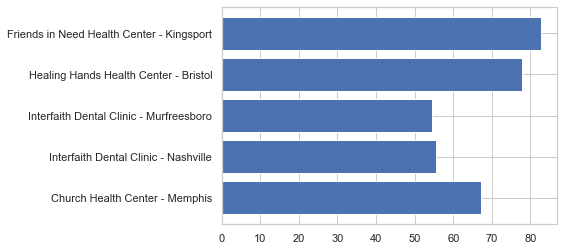

In [87]:
plt.barh('location', 'percentage', data = combo)

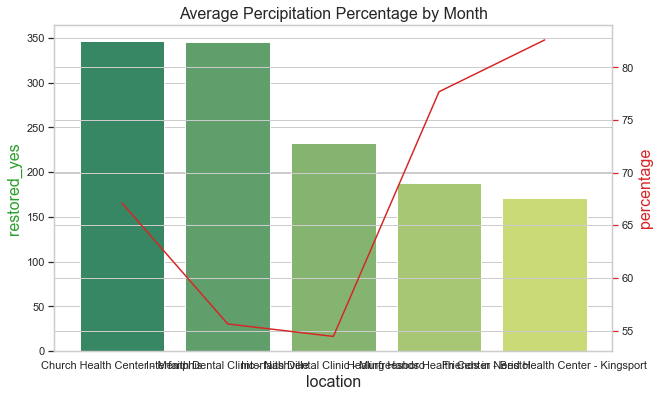

In [88]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Average Percipitation Percentage by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 = sns.barplot(x='location', y='restored_yes', data = combo , palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.lineplot(x='location', y='percentage', data = combo, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [91]:
combo

,location,restored_yes,restored_no,total,percentage
0,Church Health Center - Memphis,347,170,517,67.117988
1,Interfaith Dental Clinic - Nashville,346,276,622,55.627010
2,Interfaith Dental Clinic - Murfreesboro,233,195,428,54.439252
3,Healing Hands Health Center - Bristol,188,54,242,77.685950
4,Friends in Need Health Center - Kingsport,171,36,207,82.608696


In [92]:
import re

In [93]:
print(re.sub(' - ', '\n', 'Church Health Center - Memphis'))

Church Health Center
Memphis


In [94]:
list = []
for index, row in combo.iterrows():
    list.append(re.sub(' - ', '\n', row['location']))

In [95]:
list

['Church Health Center\nMemphis',
 'Interfaith Dental Clinic\nNashville',
 'Interfaith Dental Clinic\nMurfreesboro',
 'Healing Hands Health Center\nBristol',
 'Friends in Need Health Center\nKingsport']

In [96]:
combo['new'] = list

In [97]:
combo

,location,restored_yes,restored_no,total,percentage,new
0,Church Health Center - Memphis,347,170,517,67.117988,Church Health Center\nMemphis
1,Interfaith Dental Clinic - Nashville,346,276,622,55.627010,Interfaith Dental Clinic\nNashville
2,Interfaith Dental Clinic - Murfreesboro,233,195,428,54.439252,Interfaith Dental Clinic\nMurfreesboro
3,Healing Hands Health Center - Bristol,188,54,242,77.685950,Healing Hands Health Center\nBristol
4,Friends in Need Health Center - Kingsport,171,36,207,82.608696,Friends in Need Health Center\nKingsport


ConversionError: Failed to convert value(s) to axis units: 0               Church Health Center - Memphis
1         Interfaith Dental Clinic - Nashville
2      Interfaith Dental Clinic - Murfreesboro
3        Healing Hands Health Center - Bristol
4    Friends in Need Health Center - Kingsport
Name: location, dtype: object

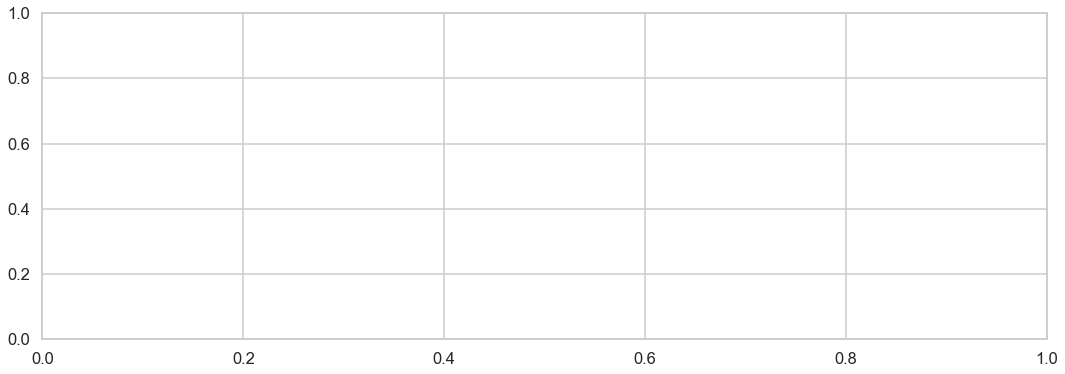

In [100]:
f, ax = plt.subplots(figsize=(18,6))
width = 0.6
x = np.arange(len(combo.location.unique()))
plt.bar(x, combo['restored_yes'], combo['location'], width, label = 'restored', color='#ffa500', alpha=0.85)
plt.bar(x + width, combo['restored_no'], combo['location'], width, label = 'not restored', color = '#e60000', alpha = 0.85)
plt.xticks(fontsize = 13)
plt.xlabel("Location", fontsize=14, labelpad=15)
#plt.yticks(np.arange(0,550, step=50), fontsize =13)
plt.ylabel("Patients", fontsize=14, labelpad=15)
ax.legend(loc = 'best', fontsize = 13)
plt.show();

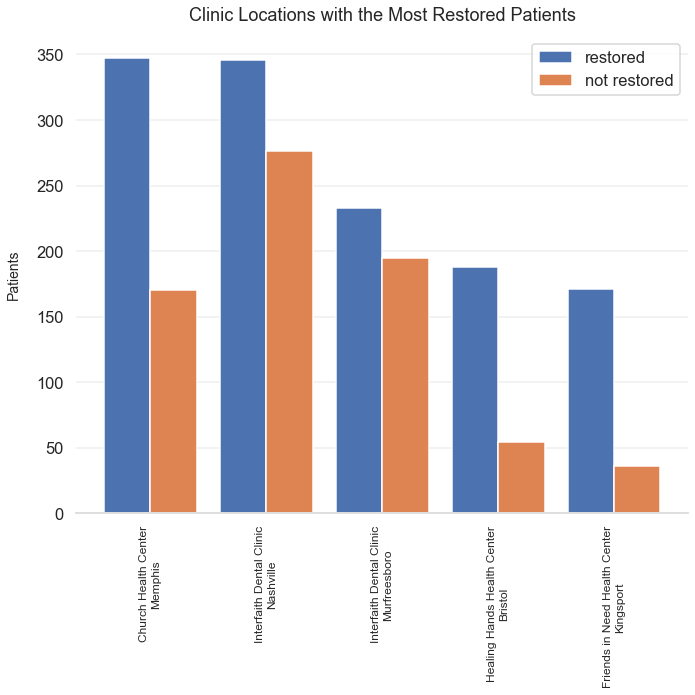

In [99]:
# Use Seaborn's context settings to make fonts larger.
sns.set_context('talk')

# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=((10, 10)))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
x = np.arange(len(combo['new'].unique()))

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(x, combo['restored_yes'],
            width=bar_width, label='restored')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, combo['restored_no'],
            width=bar_width, label='not restored')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(combo['new'].unique())
plt.xticks(rotation=90, fontsize = 12)

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
#ax.set_xlabel('Location', labelpad=15, fontsize=12)
ax.set_ylabel('Patients', labelpad=15, fontsize=14)
ax.set_title('Clinic Locations with the Most Restored Patients', pad=15)

fig.tight_layout()

In [103]:
#smile_on[smile_on['SMILE ON 60+ Oral Care Encounter - 1351 - Quantity'] == 8]

In [104]:
smile_on['SMILE ON 60+ Oral Care Encounter - 1351 - Quantity'].value_counts()

1.0    4
8.0    1
2.0    1
4.0    1
Name: SMILE ON 60+ Oral Care Encounter - 1351 - Quantity, dtype: int64

In [106]:
#city_info_tn

In [108]:
#patients_restored

In [109]:
patients_city = patients.groupby('CityName').size()

In [110]:
patients_city

CityName
1450830        1
Adamsville     1
Afton          3
Alamo          1
Alcoa          8
              ..
Williston      1
Winchester    16
Woodbine       7
Woodbury      40
Woodlawn       7
Length: 387, dtype: int64